In [51]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D,BatchNormalization
from keras.activations import leaky_relu
from keras.preprocessing.image import ImageDataGenerator   
from keras import Sequential
import matplotlib.pyplot as plt
import math
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [52]:
len_classes=2
dropout_rate=0.01
model = Sequential(name='FCN1')

# 1st Convolutional Layer
model.add(Conv2D(filters=64, input_shape=(227, 227,1), kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same'))

##########33
 # model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, strides=1))
model.add(Dropout(dropout_rate))
# model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1))
model.add(Dropout(dropout_rate))
# model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())
model.add(GlobalMaxPooling2D())
model.add(Activation('sigmoid'))

model.summary()


Model: "FCN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 114, 114, 64)      640       
                                                                 
 activation_80 (Activation)  (None, 114, 114, 64)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 114, 114, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 activation_81 (Activation)  (None, 57, 57, 128)       0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 57, 57, 128)      0         
 g2D)                                                         

In [53]:
image_shape=(227,227)
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=5, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=5,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [54]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [55]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [56]:
history = model.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 23s 250ms/step - loss: 0.9508 - binary_accuracy: 0.4986 - val_loss: 1.4702 - val_binary_accuracy: 0.4947
Epoch 2/100
89/89 [==============================] - 23s 252ms/step - loss: 0.8800 - binary_accuracy: 0.4974 - val_loss: 0.7099 - val_binary_accuracy: 0.4745
Epoch 3/100
89/89 [==============================] - 23s 252ms/step - loss: 0.7387 - binary_accuracy: 0.5134 - val_loss: 0.7682 - val_binary_accuracy: 0.5053
Epoch 4/100
89/89 [==============================] - 23s 253ms/step - loss: 0.6906 - binary_accuracy: 0.5211 - val_loss: 0.6994 - val_binary_accuracy: 0.5053
Epoch 5/100
89/89 [==============================] - 25s 278ms/step - loss: 0.6935 - binary_accuracy: 0.4935 - val_loss: 0.6932 - val_binary_accuracy: 0.5053
Epoch 6/100
89/89 [==============================] - 22s 252ms/step - loss: 0.6932 - binary_accuracy: 0.5030 - val_loss: 0.6926 - val_binary_accuracy: 0.5053
Epoch 7/100
89/89 [==============================] -

In [57]:
epochs_run=len(history.epoch)

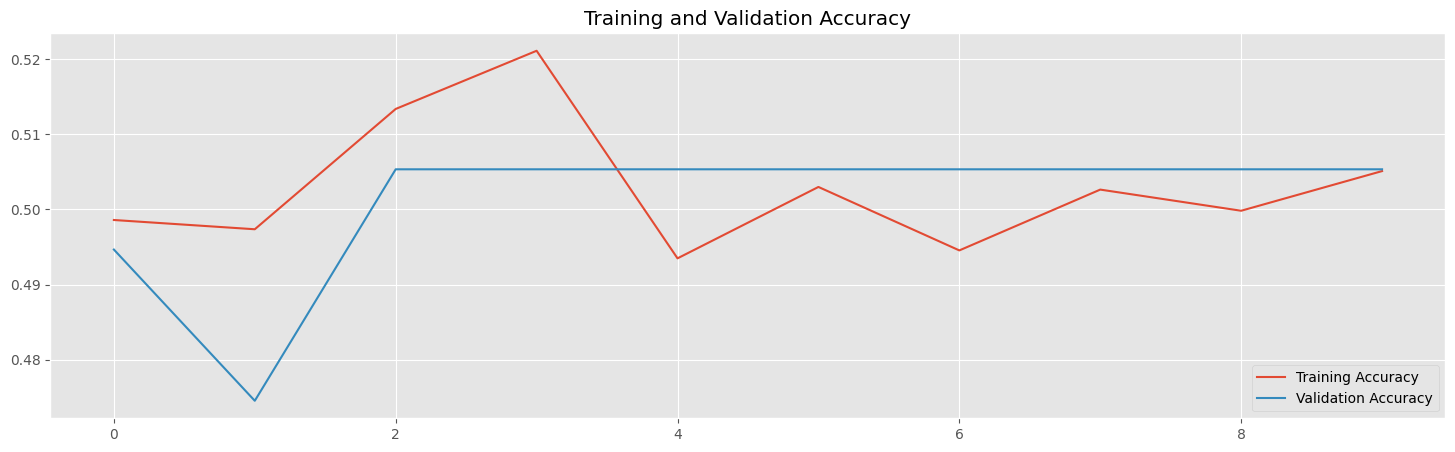

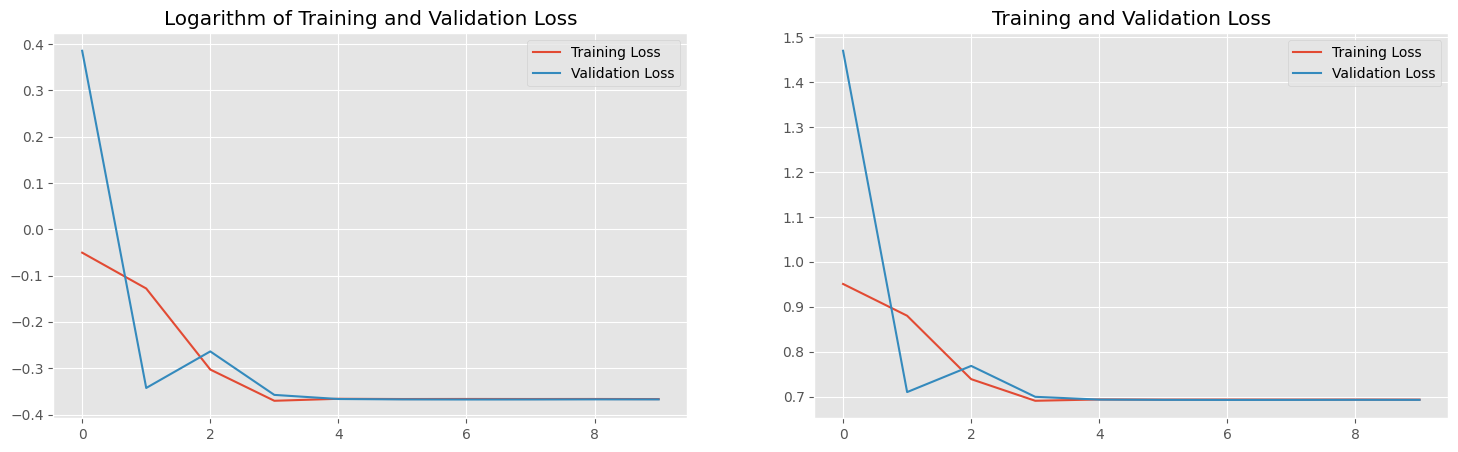

In [58]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [59]:
results = model.evaluate(test_data)
print("test loss, test acc:", results)

15/15 [==============================] - 1s 83ms/step - loss: 0.6918 - binary_accuracy: 0.5556
test loss, test acc: [0.6917620301246643, 0.5555555820465088]


In [60]:
model.save("../models/fcn_1_ultrasound")

INFO:tensorflow:Assets written to: ../models/fcn_1_ultrasound/assets


INFO:tensorflow:Assets written to: ../models/fcn_1_ultrasound/assets
